In [136]:
%reload_ext autoreload
%autoreload 2

from PySpice.Spice.Netlist import Circuit, SubCircuit
from PySpice.Spice.Parser import SpiceParser
from PySpice.Probe.WaveForm import WaveForm
from PySpice.Unit import *
import PySpice
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import ltspice
import os
from helpers import *
from spice_net import *

In [137]:
PySpice.Spice.Simulation.CircuitSimulator.DEFAULT_SIMULATOR = 'ngspice-subprocess'

In [138]:
vd_graph = nx.from_numpy_array(np.array([[0, 0, 0], [1, 0, 0], [0, 1, 0]]), create_using=nx.DiGraph)
vd_graph[1][0]['weight'] = 2
vd_graph[2][1]['weight'] = 1

In [139]:
transistor = TransistorNetwork('transistor_test', con_graph=vd_graph, node_cfg=(np.array([[2, 0]]), np.array([[1, 0]])), epsilon=1e-16)
ground_ref = GroundReferenceNetwork('ground_ref_test', con_graph=vd_graph, node_cfg=(np.array([[2, 0]]), np.array([[1, 0]])), epsilon=1e-16)
linear = LinearNetwork('linear_test', con_graph=vd_graph, node_cfg=(np.array([[2, 0]]), np.array([[1, 0]])), epsilon=1e-16)

In [140]:
dset = {}
dset['x'] = np.array([0, 1, 2, 3, 2, 1])[:,None]/3
dset['y'] = dset['x'] * 2 / 3

In [141]:
eta = 0.1
gamma = 1/eta

linear, loss, updates, weights = train(linear, dset['x'], dset['y'], epochs=10, gamma=gamma, eta=eta)

Epoch 1: 0.008047514075450145
Epoch 2: 0.0017738803994383457
Epoch 3: 0.0003526354643529602
Epoch 4: 6.489516061498478e-05
Epoch 5: 1.1459292095211122e-05
Epoch 6: 1.98648188187327e-06
Epoch 7: 3.412999417124888e-07
Epoch 8: 5.8437153441975997e-08
Epoch 9: 9.99108746749135e-09
Epoch 10: 1.7071067344441865e-09


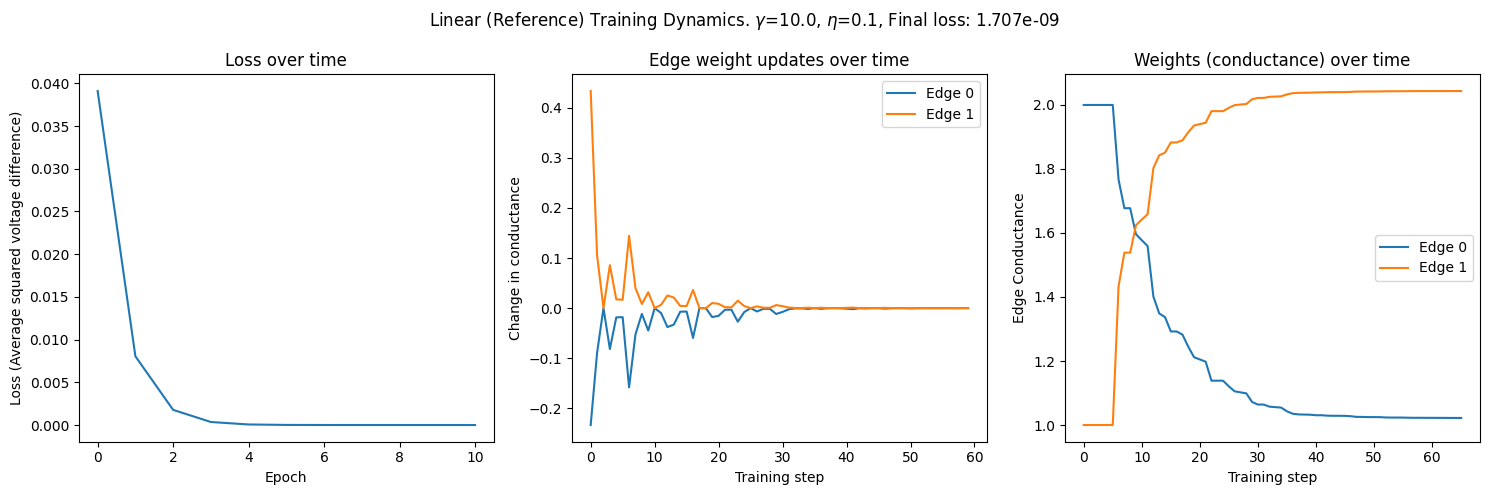

In [142]:
fig = plt.figure(figsize=(15, 5))
plt.suptitle(f'Linear (Reference) Training Dynamics. $\gamma$={gamma}, $\eta$={eta}, Final loss: {loss[-1]:.3e}')

plt.subplot(1, 3, 1)
plt.plot(loss)
plt.title('Loss over time')
plt.xlabel('Epoch')
plt.ylabel('Loss (Average squared voltage difference)')

plt.subplot(1, 3, 2)
plt.plot(updates.reshape(-1, updates.shape[-1]))
plt.title('Edge weight updates over time')
plt.legend([f'Edge {i}' for i in range(weights.shape[-1])])
plt.xlabel('Training step')
plt.ylabel('Change in conductance')

plt.subplot(1, 3, 3)
plt.plot(weights.reshape(-1, weights.shape[-1]))
plt.legend([f'Edge {i}' for i in range(weights.shape[-1])])
plt.title('Weights (conductance) over time')
plt.xlabel('Training step')
plt.ylabel('Edge Conductance')

plt.tight_layout()
plt.show()

In [143]:
eta = 0.1
gamma = 1/eta
transistor, loss, updates, weights = train(transistor, dset['x'], dset['y'], epochs=10, gamma=gamma, eta=eta)

Epoch 1: 0.009935395733177312
Epoch 2: 0.009532055120811681
Epoch 3: 0.009144815793929487
Epoch 4: 0.008773916748157083
Epoch 5: 0.008435186915066605
Epoch 6: 0.008211735065518599
Epoch 7: 0.008073401786246834
Epoch 8: 0.007921897636006557
Epoch 9: 0.007782742046662895
Epoch 10: 0.007637165595175394


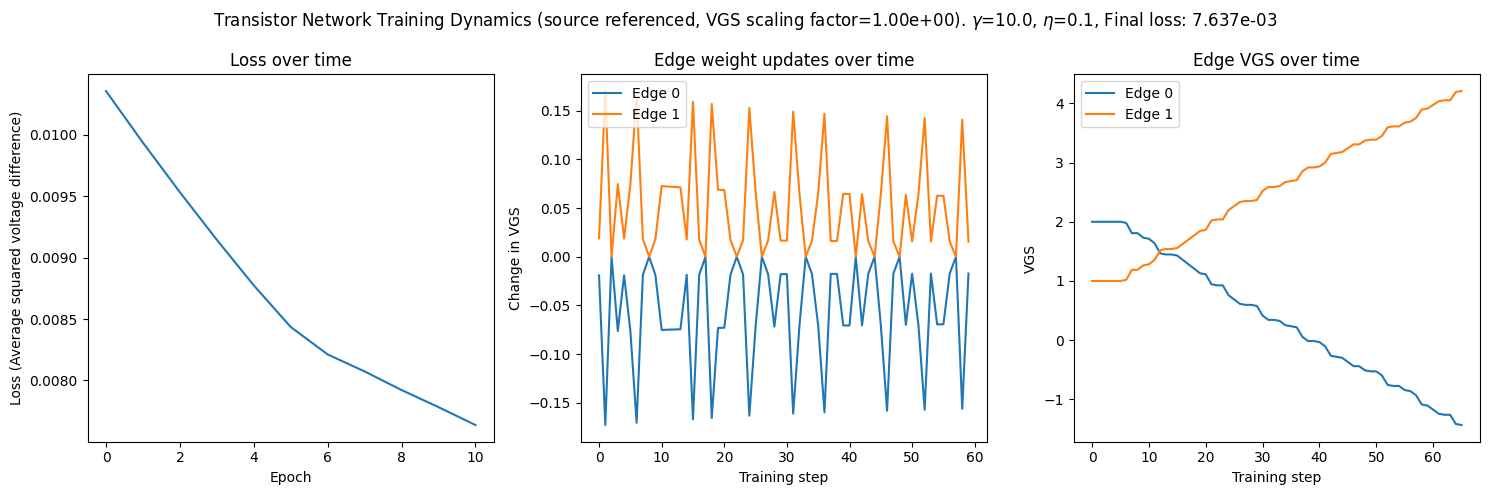

In [144]:
fig = plt.figure(figsize=(15, 5))
plt.suptitle(f'Transistor Network Training Dynamics (source referenced, VGS scaling factor={transistor.edges[0].alpha:.2e}). $\gamma$={gamma}, $\eta$={eta}, Final loss: {loss[-1]:.3e}')

plt.subplot(1, 3, 1)
plt.plot(loss)
plt.title('Loss over time')
plt.xlabel('Epoch')
plt.ylabel('Loss (Average squared voltage difference)')

plt.subplot(1, 3, 2)
plt.plot(updates.reshape(-1, updates.shape[-1]))
plt.title('Edge weight updates over time')
plt.legend([f'Edge {i}' for i in range(weights.shape[-1])])
plt.xlabel('Training step')
plt.ylabel('Change in VGS')

plt.subplot(1, 3, 3)
plt.plot(weights.reshape(-1, weights.shape[-1]))
plt.legend([f'Edge {i}' for i in range(weights.shape[-1])])
plt.title('Edge VGS over time')
plt.xlabel('Training step')
plt.ylabel('VGS')

plt.tight_layout()
plt.show()

In [145]:
eta = 0.1
gamma = 1/eta
ground_ref, loss, updates, weights = train(ground_ref, dset['x'], dset['y'], epochs=10, gamma=gamma, eta=eta)

Epoch 1: 0.01016055751323994
Epoch 2: 0.009748044327412367
Epoch 3: 0.009352164443748432
Epoch 4: 0.008972202756484674
Epoch 5: 0.008612406044222982
Epoch 6: 0.008430981359758777
Epoch 7: 0.008270353484960594
Epoch 8: 0.008113996432197228
Epoch 9: 0.007962022860007476
Epoch 10: 0.007794483925477863


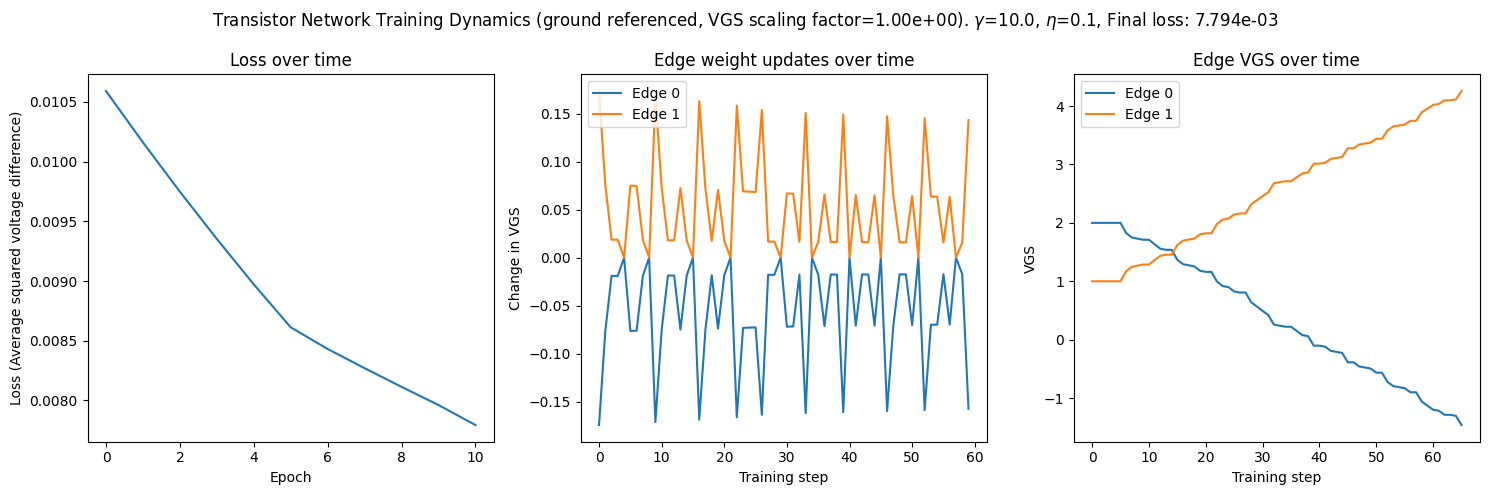

In [146]:
fig = plt.figure(figsize=(15, 5))
plt.suptitle(f'Transistor Network Training Dynamics (ground referenced, VGS scaling factor={transistor.edges[0].alpha:.2e}). $\gamma$={gamma}, $\eta$={eta}, Final loss: {loss[-1]:.3e}')

plt.subplot(1, 3, 1)
plt.plot(loss)
plt.title('Loss over time')
plt.xlabel('Epoch')
plt.ylabel('Loss (Average squared voltage difference)')

plt.subplot(1, 3, 2)
plt.plot(updates.reshape(-1, updates.shape[-1]))
plt.title('Edge weight updates over time')
plt.legend([f'Edge {i}' for i in range(weights.shape[-1])])
plt.xlabel('Training step')
plt.ylabel('Change in VGS')

plt.subplot(1, 3, 3)
plt.plot(weights.reshape(-1, weights.shape[-1]))
plt.legend([f'Edge {i}' for i in range(weights.shape[-1])])
plt.title('Edge VGS over time')
plt.xlabel('Training step')
plt.ylabel('VGS')

plt.tight_layout()
plt.show()

In [126]:
print(transistor)

.title transistor_test
.subckt e1 t_D t_S
V1 t_G t_S -1.4333713044552323
R1 t_D t_S 1000
M1 t_D t_G t_S t_S Ideal
.model Ideal NMOS (level=1)
.ends e1

.subckt e2 t_D t_S
V1 t_G t_S 4.208884854949912
R1 t_D t_S 1000
M1 t_D t_G t_S t_S Ideal
.model Ideal NMOS (level=1)
.ends e2
B1 2 0 v=pwl(V(index), 1, 0.3333333333333333, 2, 0.3333333333333333, 3, 0.6666666666666666, 4, 0.6666666666666666, 5, 0.0, 6, 1.0)
Vindex index 0 1
X1 1 0 e1
X2 2 1 e2



## Test to make sure update functions work correctly

In [147]:
# redefine networks from earlier
vd_graph = nx.from_numpy_array(np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]]))
vd_graph[1][0]['weight'] = 2
vd_graph[2][1]['weight'] = 1

transistor = TransistorNetwork('transistor_test', con_graph=vd_graph, node_cfg=(np.array([[2, 0]]), np.array([[1, 0]])), epsilon=1e-16)
scaled = ScaledTransistorNetwork('scaled_test', con_graph=vd_graph, node_cfg=(np.array([[2, 0]]), np.array([[1, 0]])), epsilon=1e-16)
linear = LinearNetwork('linear_test', con_graph=vd_graph, node_cfg=(np.array([[2, 0]]), np.array([[1, 0]])), epsilon=1e-16)
ground_ref = GroundReferenceNetwork('ground_ref_test', con_graph=vd_graph, node_cfg=(np.array([[2, 0]]), np.array([[1, 0]])), epsilon=1e-16)

In [148]:
test_pt = np.array([[0.1]])

In [149]:
# compare network responses over various updates
transistor_outputs = [transistor.predict(test_pt).item()]
scaled_outputs = [scaled.predict(test_pt).item()]
linear_outputs = [linear.predict(test_pt).item()]
ground_ref_outputs = [ground_ref.predict(test_pt).item()]

updates = 0.1*np.ones((10,1))

for i, update in enumerate(updates):
    transistor.update(update)
    scaled.update(update)
    linear.update(update)
    ground_ref.update(update)

    transistor_outputs.append(transistor.predict(test_pt).item())
    scaled_outputs.append(scaled.predict(test_pt).item())
    linear_outputs.append(linear.predict(test_pt).item())
    ground_ref_outputs.append(ground_ref.predict(test_pt).item())

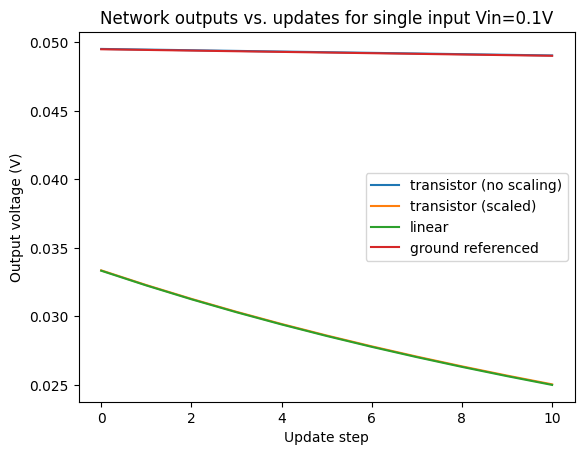

In [152]:
plt.plot(transistor_outputs, label='transistor (no scaling)')
plt.plot(scaled_outputs, label='transistor (scaled)')
plt.plot(linear_outputs, label='linear')
plt.plot(ground_ref_outputs, label='ground referenced')
plt.title(f'Network outputs vs. updates for single input Vin={test_pt.item()}V')
plt.legend()

plt.xlabel('Update step')
plt.ylabel('Output voltage (V)')

plt.show()

In [111]:
print(linear); 

.title linear_test
.subckt e1 t_D t_S
R1 t_D t_S 0.33333333333333326
.ends e1

.subckt e2 t_D t_S
R1 t_D t_S 1.0
.ends e2
B1 2 0 v=0.1
Vindex index 0 1
X1 0 1 e1
X2 1 2 e2



In [83]:
print(transistor); 

.title transistor_test
.subckt e1 t_D t_S
V1 t_G t_S 3.000000000000001
R1 t_D t_S 1e-16
M1 t_D t_G t_S t_S Ideal
.model Ideal NMOS (level=1)
.ends e1

.subckt e2 t_D t_S
V1 t_G t_S 1
R1 t_D t_S 1e-16
M1 t_D t_G t_S t_S Ideal
.model Ideal NMOS (level=1)
.ends e2
B1 2 0 v=0.1
Vindex index 0 1
Rdummy1 1 0 1e+16
Rdummy2 2 0 1e+16
X1 0 1 e1
X2 1 2 e2

